In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from scipy import signal

pi = np.pi

In [25]:
def adeltamod(sig_in, sig_sam ,Delta, td,ts):
    ADMout = []
    if (round(ts/td) >= 2):
        Nfac = round(ts/td)
        lx_sig = len(sig_sam)
        lsig_in = len(sig_in)
        ADMout.extend(repeat(0,lsig_in))

        cnt1 = 0
        cnt2 = 0
        sum= 0
        for i in range(1,lx_sig):
            if sig_sam[i] == sum:
                pass
            elif sig_sam[i] > sum:
                if cnt1 < 2:
                    sum += Delta
                elif cnt1 == 2:
                    sum += 2 * Delta
                elif cnt1 == 3:
                    sum += 4 * Delta
                else:
                    sum += 8 * Delta
                if (sum < sig_sam[i]):
                    cnt1 += 1
                else:
                    cnt1 = 0
            else:
                if cnt2 < 2:
                    sum -= Delta
                elif (cnt2 == 2):
                    sum -= 2 * Delta
                elif (cnt2 == 3):
                    sum -= 4 * Delta
                else:
                    sum -= 8 * Delta
                if sum > sig_sam[i]:
                    cnt2 += 1
                else:
                    cnt2 = 0
            for j in range((i - 1) * Nfac + 1, i * Nfac + 1):
                 ADMout[j - 1] = sum  
    return ADMout

def delta_dm(A, fm, fs, pi):
    return 2 * A * fm * pi / fs



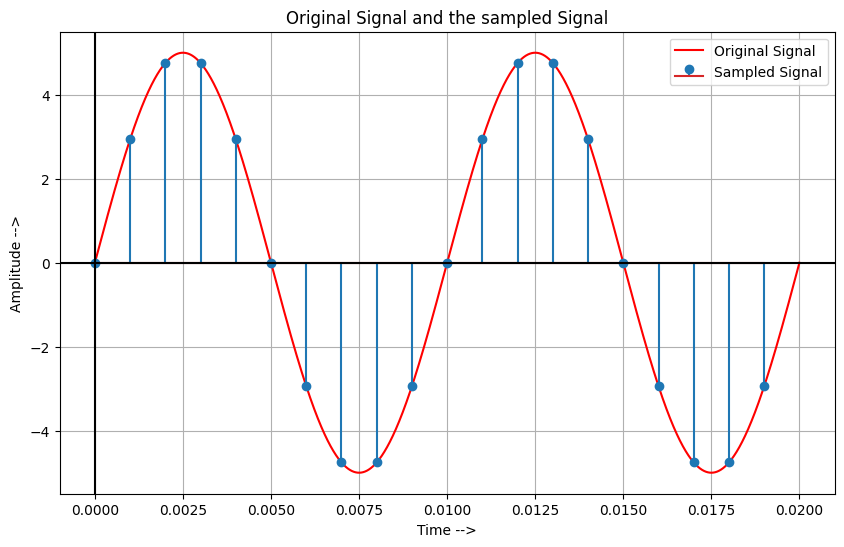

In [26]:
A = 5 #Amplitude for input signal
fm = 100 #Message Frequency
tm = 1 / fm
M = 10  #Nyquist Constant
fs = M * fm  #Sampling Frequency
ts = 1 / fs  #Sampling Period
cycles = 2   #Number of cycles
t_org = np.linspace(0, M * cycles * ts, 100000)   #Points for original signal
t_sam = np.arange(0, M * cycles * ts, ts)         #Points for sampled signal
x_org = A * np.sin(2 * pi * fm * t_org)           #Original signal
x_sam = A * np.sin(2 * pi * fm * t_sam)           #Sampled Signal

plt.figure(figsize=(10,6))
plt.plot(t_org, x_org, color = 'red')
plt.stem(t_sam,x_sam)
plt.title('Original Signal and the sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.legend(['Original Signal', 'Sampled Signal'], loc = 'upper right')
plt.grid(True)
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.show()

In [27]:
delta = delta_dm(A,fm,fs,pi)
quan = adeltamod(x_org, x_sam, delta, tm, ts)
len(quan)

0

In [28]:
%   (adeltamod.m)

%   Adaptive Delta Modulator
%   by Gandhar Desai (gdesai)
%   BITS Pilani Goa Campus
%   Date: 28 Sept, 2013

%   The working of the Advanced Delta Modulator is similar to the regular
%   Delta Modulator. The only difference is that the amplitude step 
%   size is variable and it keeps getting doubled if the previous output/s
%   don't seem to 'catch up' with the input signal. This problem is
%   referred to as 'Slope overload' in textbooks.

function [ADMout] = adeltamod(sig_in, Delta, td, ts)
%   Usage
%       ADMout = adeltamod(sig_in, Delta, fs);
%   Delta -- min. step size. This will be multiplied 2nX if required
%   sig_in -- the signal input, should be a vector
%   td -- the original sampling period of the input signal, sig_in
%   ts -- the required sampling period for ADM output. Note that it
%           should be an integral multiple of the input signal's period.
%           If not, it will be rounded up to the nearest integer.
%   Function output: ADMout


    if (round(ts/td) >= 2)
        Nfac = round(ts/td);    %Nearest integer
        xsig = downsample(sig_in,Nfac);
        Lxsig = length(xsig);
        Lsig_in = length(sig_in);
        
        ADMout = zeros(Lsig_in);    %Initialising output
        
        cnt1 = 0;   %Counters for no. of previous consecutively increasing 
        cnt2 = 0;   %steps
        sum = 0;

        for i=1:Lxsig
            
            if (xsig(i) == sum)


            elseif (xsig(i) > sum)

                if (cnt1 < 2)
                    sum = sum + Delta;  %Step up by Delta, same as in DM
                elseif (cnt1 == 2)
                    sum = sum + 2*Delta;    %Double the step size after
                                            %first two increase
                elseif (cnt1 == 3)
                    sum = sum + 4*Delta;    %Double step size
                else
                    sum = sum + 8*Delta;    %Still double and then stop
                                            %doubling thereon
                end

                if (sum < xsig(i))
                    cnt1 = cnt1 + 1;
                else
                    cnt1 = 0;
                end

            else

                if (cnt2 < 2)
                    sum = sum - Delta;
                elseif (cnt2 == 2)
                    sum = sum - 2*Delta;
                elseif (cnt2 == 3)
                    sum = sum - 4*Delta;
                else
                    sum = sum - 8*Delta;
                end

                if (sum > xsig(i))
                    cnt2 = cnt2 + 1;
                else
                    cnt2 = 0;
                end

            end

            ADMout(((i-1)*Nfac + 1):(i*Nfac)) = sum;
        end
    end
end

IndentationError: unexpected indent (811593005.py, line 26)

In [ ]:
def adeltamod(sig_in, Delta, td, ts):
    if (round(ts/td) >= 2):
        Nfac = round(ts/td)
        xsig = sig_in[::Nfac]
        Lxsig = len(xsig)
        Lsig_in = len(sig_in)
        ADMout = [0] * Lsig_in
        cnt1 = 0
        cnt2 = 0
        sum = 0
        for i in range(Lxsig):
            if (xsig[i] == sum):
                pass
            elif (xsig[i] > sum):
                if (cnt1 < 2):
                    sum = sum + Delta
                elif (cnt1 == 2):
                    sum = sum + 2*Delta
                elif (cnt1 == 3):
                    sum = sum + 4*Delta
                else:
                    sum = sum + 8*Delta
                if (sum < xsig[i]):
                    cnt1 = cnt1 + 1
                else:
                    cnt1 = 0
            else:
                if (cnt2 < 2):
                    sum = sum - Delta
                elif (cnt2 == 2):
                    sum = sum - 2*Delta
                elif (cnt2 == 3):
                    sum = sum - 4*Delta
                else:
                    sum = sum - 8*Delta
                if (sum > xsig[i]):
                    cnt2 = cnt2 + 1
                else:
                    cnt2 = 0
            ADMout[((i-1)*Nfac + 1):(i*Nfac)] = [sum] * Nfac
    return ADMout

